In [1]:
import utils
import numpy as np

In [2]:
# Create a Company Class Pointed at 'A', agilent
firstcompany = utils.company('A')

# Or we could get the first company from the function get_company_list
firstcompany = utils.company(utils.get_company_list()[0])

In [3]:
# Show the original data range
print(firstcompany.start, firstcompany.end)

2013-09-12T00:00:00.000000000 2023-09-29T00:00:00.000000000


In [4]:
# Update the data range 
firstcompany.update_time_range('2019-01-01','2020-10-01',365)
# we study the data between 2010-01-01 and 2020-10-01, and the time interval is 30days 
print(firstcompany.start, firstcompany.end)

2019-01-01 00:00:00 2020-10-01 00:00:00


In [5]:
# fetch a single data , for example , the price 
price = firstcompany.read_single_data(('price','Close'))
print("price: {}".format(price))

price: [65.690002 78.260002]


In [6]:
# But we also need the time for the price
print("Time: {}".format(firstcompany.time_series))
# The end time may not be exactly 2020-10-01 because of the interval we set 

Time: [Timestamp('2019-01-01 00:00:00') Timestamp('2020-01-01 00:00:00')]


In [7]:
# fetch a list of data, it will return a tuple of (time_series , and data )
data = firstcompany.read_data([('price','Close'),('balance','CurrentAssets'),('esg','S&P Global ESG Score')])
# The data is a n*m 2d array, the n is the number of parameters and the m the number of datapoints
# The time series also have the length of m 
print(len(data),  len(data[0]),np.shape(data[1]))

2 2 (3, 2)


# ML Demo

In [8]:
firstcompany = utils.company('AAPL')
data = firstcompany.read_data([('price','Close'),('balance','CurrentAssets')])

In [9]:
# And then we will have a linear regression demo 
# The first row is price , the second row is CurrentAssets 
y = data[1][0]
data_x = data[1][1]

In [10]:
np.polyfit(data_x, y, 1)

array([ 6.29351136e-10, -6.68775433e+00])

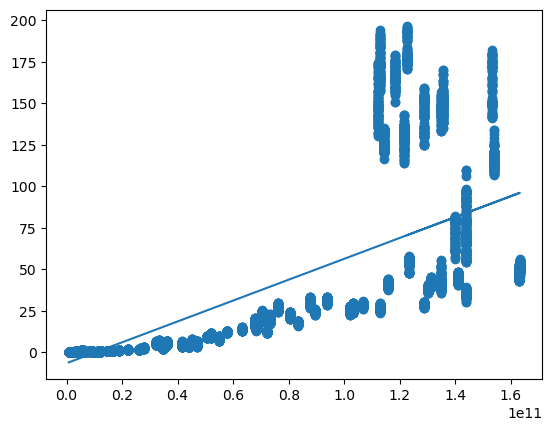

In [11]:
from matplotlib import pyplot as plt
plt.scatter(data_x , y)
plt.plot(data_x ,np.polyfit(data_x, y, 1)[0]* data_x + np.polyfit(data_x, y, 1)[1] )